# The Solow Model
This project will solve The Solow Model which explains long-run economic growth. First the basic Solow model for a closed economy is analyzed. The Solow Diagram and the convergence of capital and GDP is plotted. Then the model is extended with technological growth.

## The Basic Solow Model
The equations of the Solow model without any extensions are as follows:

1. $ Y_t = BK^\alpha_tL_t^{1-\alpha}, \quad 0<\alpha<1 $

2. $ K_{t+1} = (1-\delta)K_t+S_t, \quad 0<\delta<1 \; and \; K_0 \; \text{is given} $

3. $ S_t = sY_t, \quad 0<s<1 $

4. $ L_{t+1} = (1+n)L_t, \quad L_0 \text{ given} $

Equation 1. is a Cobb-Douglas production function where $K_t$ is capital, $L_t$ is labor and $B$ is the total factor productivity.  
Equation 2. describes how the capital is accumulated from period $t$ to $t+1$.  
Equation 3. describes the savings in the economy. Each household saves a fraction $s$ out of the income.  
Equation 4. describes the labor force growth from period $t$ to $t+1$ where $n$ is the population growht.  


**The Transition Equation**  
The transition equation for $k_t$ is

$ k_{t+1} = \dfrac{1}{1+n} (sBk_t^\alpha + (1-\delta)k_t) $  

by subtracting $k_t$ on both sides we get the Solow equation  

$ k_{t+1} - k_t = \dfrac{1}{1+n} (sBk_t^\alpha - (n+g)k_t) $  

**Steady State**  
Plugging in $k^*=k_t=k_{t+1}$ and isolating $k^*$ we get the equation for the capital steady state 

$ k^* = B^{\frac{1}{1-\alpha}} \left( \dfrac{s}{n+\delta} \right)^{\frac{1}{1-\alpha}} $  

Plugging $k^*$ into the BNP per capita equation, $y_t =Bk_t^\alpha$, we get the steady state for BNP/capita  

$ y^* = B^{\frac{1}{1-\alpha}} \left( \dfrac{s}{n+\delta} \right)^{\frac{\alpha}{1-\alpha}} $  




**Importing needed packages**

In [1]:
import numpy as np
import pandas as pd
import sympy as sm
import matplotlib.pyplot as plt
from scipy import linalg
from scipy import optimize
sm.init_printing(use_unicode=True) #for pretty printing

**Defining Symbols**

In [2]:
kt1 = sm.symbols('k_{t+1}')
n = sm.symbols('n')
s = sm.symbols('s')
B = sm.symbols('B')
kt = sm.symbols('k_t')
alpha = sm.symbols('alpha')
delta = sm.symbols('delta')
L0 = sm.symbols('L_0')
L = sm.symbols('L')
K0 = sm.symbols('K_0')
K = sm.symbols('K')
yt = sm.symbols('y_t')

**Defining Equations and Finding Steady State Expressions**

The steady states of k and y are


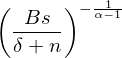

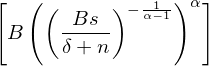

In [3]:
# Transition Equation
treq = sm.Eq((1/(1+n)*(s*B*kt**alpha+(1-delta)*kt)),kt1)
sole = sm.Eq((1/(1+n)*(s*B*kt**alpha-(n+delta)*kt)))

# Solving to get the steady state equations for k and y
print('The steady states of k and y are')
k = sm.solve(sole,kt)[0]
display(k)

cdp = sm.Eq(B*k**alpha,yt)
y = sm.solve(cdp,yt)
cdp
display(y)


**Defining parameters and solution**

In [4]:
# Making the SS-functions k and y into lambda functions that can be used to calculate numerical values
ssk_sol = sm.lambdify((alpha,delta,s,B,n),k)
ssy_sol = sm.lambdify((alpha,delta,s,B,n),y)

# Defining parameter values
alpha = 1/3
delta = 0.05
s = 0.101
B = 1
n = 0.025

# Getting solution for defined parameters 
ssk_val = ssk_sol(alpha,delta,s,B,n) 
ssk_val
ssy_val = ssy_sol(alpha,delta,s,B,n) 

# Printing result
print(f'For the chosen parameters, the steady state capital is {ssk_val:.3f} and the steady state value of GDP per capita is')
print(ssy_val)

For the chosen parameters, the steady state capital is 4.355 and the steady state value of GDP per capita is
[1.6329931618554518]


Thus, capital is about 56 percent higher and GDP per capita is 16 percent higher in steady state compared to the initial state.

## The Solow Diagram

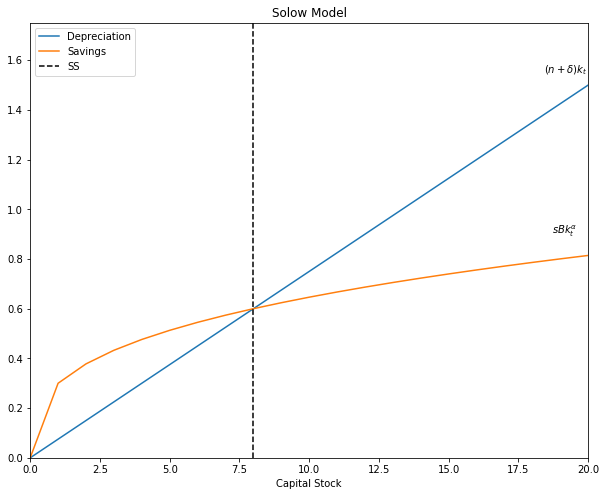

In [5]:
# Create model domain and empty array for values of K
K_size = 50                    
kt = np.arange(K_size)   

# Parameters
alpha = 1/3
delta = 0.05
s = 0.3
B = 1
n = 0.025

# Defining CD-function
def GDP(kt):   
    y = B * (kt)**(alpha)       
    return y

# Defining equations for diagram
y = GDP(kt)
dep = (delta+n)*kt
S = s*B*kt**alpha

# Defining steady state expressions
ssk = (B**(1/(1-alpha))*(s/(n+delta))**(1/(1-alpha)))
ssy = (B**(1/(1-alpha))*(s/(n+delta))**(alpha/(1-alpha)))

# Plotting the Solow Diagram 
y_max = np.max(y)
v = [0, 20, 0, 1.75]

fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(kt, dep, ls = '-', label="Depreciation")
ax.plot(kt, S, ls = '-', label="Savings")
ax.set(title="Solow Model", xlabel="Capital Stock")
plt.text(18.4, 1.55,  r'$ (n+\delta)k_t$')
plt.text(18.7,.9, r'$sBk_t^\alpha$')
plt.axvline(x = ssk, ls = "--", color = 'k', label='SS')
plt.legend(loc=2)
plt.axis(v)
plt.show()

## Plotting the convergence to Steady State  
In the following the convergence of the values found in the previous section are plotted.

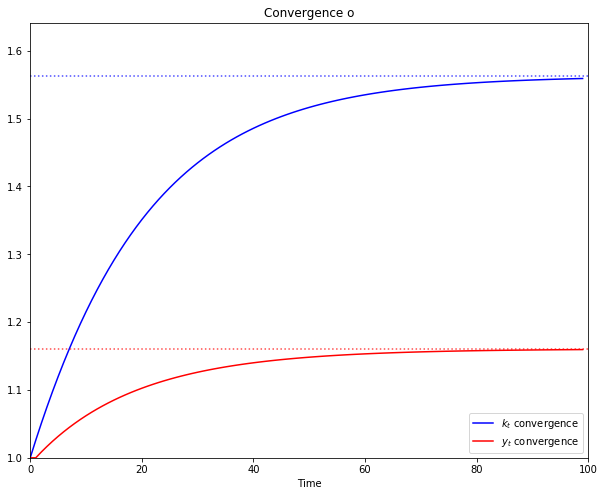

In [6]:
# Defining parameters and arrays
alpha = 1/3
delta = 0.05
s = 0.101
B = 1
n = 0.025
K0 = 1
L0 = 1
K_size = 100
kt = np.arange(K_size)   #creates array of size K_size - here 100
Y_size = 100
yt = np.arange(Y_size)

# Defining starting point of function
T = 100
time = np.arange(T)
k1 = np.zeros(T)
y1 = np.zeros(T)

ssk = (B**(1/(1-alpha))*(s/(n+delta))**(1/(1-alpha)))
k1[0] = K0

ssy = (B**(1/(1-alpha))*(s/(n+delta))**(alpha/(1-alpha)))
y1[0] = L0

# Plotting the functions in per capita terms
# CD production function 
def GDP(kt):  
    y = B * (kt)**(alpha)    
    return y

# The solow function
def solow(kt):                  
    Dk = (1/(1+delta))*(s *B*(kt)**(alpha) - (n + delta)*kt)    
    return Dk
                           
Dk = solow(kt)
kdelta1 = solow(k1[0]) 

### Plot convergence of capital and GDP
for j in range(1, T):
    k1[j] = k1[j-1] + s*GDP(k1[j-1]) - (delta + n)*k1[j-1]
    y1[j] = B * k1[j-1]**alpha


v = [0, T, 1, ssk*1.05]     
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(time, k1, label="$k_t$ convergence"  , color='b', alpha = 1)
ax.plot(time, y1, label="$y_t$ convergence"  , color='r', alpha = 1)
ax.set(title="Convergence o", xlabel=r'$k$')
plt.legend(loc=4)
plt.axhline(y = ssk, ls = ":", color = 'b', alpha = 0.7)
plt.axhline(y = ssy, ls = ":", color = 'r', alpha = 0.7)
plt.axis(v)
plt.xlabel('Time')
plt.show()       
                           
                           

In [7]:
ssk = (B**(1/(1-alpha))*(s/(n+delta))**(1/(1-alpha)))
display(ssk)

## Solow Model with Technical Growth
In the basic Solow we have no positive growth in the long run because of the diminishing marginal product of capital. This is not realistic compared to reality and thus the model is now extended with technical growth. The only difference is that the $B$ in the basic model is not constant anymore, it is replaced by $ A_t^{1-\alpha}$ that grows with an exogenous growth rate, $g$. Thus, we have  
    $A_{t+1}=(1+g)A_t$
where $A_0$ is given. In this model we consider Harrod-neutral growth which means that the technological growth is labor augmenting - $Y_t = F(K_t,A_tL_t)$. The model is now
1. $Y_t = K_t^\alpha (A_tL_t)^{1-\alpha}$

2. $ K_{t+1} = (1-\delta)K_t+S_t, \quad 0<\delta<1 \; and \; K_0 \; \text{is given} $

3. $ S_t = sY_t, \quad 0<s<1 $

4. $ L_{t+1} = (1+n)L_t, \quad L_0 \text{ given} $

5. $ A_{t+1}=(1+g)A_t, \quad A_0 \text{ given} $

In the basic Solow we analyzed the model in $y_t$ and $k_t$ where we found that $y^*$ and $k^*$ were constant in steady state. If we did this here we would have a continuosly growing savings curve in terms of per capita due to the constantly growing $A_t$. Thus, the model with technological growth is analyzed in tilde-variables, which are defined as:  
    $ \tilde{k}_t = \dfrac{K_t}{A_tL_t} = \dfrac{k_t}{A_t} $  
    $ \tilde{y}_t = \dfrac{Y_t}{A_tL_t} = \dfrac{y_t}{A_t} $  
    
This gives us the physical capital and the GDP in per effective capita terms. Thus, capital and GDP are adjusted for technology and population. These terms turn out to be constant in steady state and we use them for solving the model. In reality they do not make much sense.
 
**The Transition Equation**  
The transition equation in this model is  

$ \tilde{k}_{t+1} = \dfrac{1}{(1+n)(1+g)} (s\tilde{k}_t^\alpha + (1-\delta)\tilde{k}_t ) $

**Solow Equation**  
As before it is found by subtracting $\tilde{k}_t$ on both sides of the transition equation

$ \tilde{k}_{t+1} - \tilde{k}_{t}  = \dfrac{1}{(1+n)(1+g)} [s\tilde{k}_t^\alpha - (n+g+\delta+ng)\tilde{k}_t ] $

We can also get the modified Solow equation by dividing with $\tilde{k}_{t}$ on both sides

$ \dfrac{\tilde{k}_{t+1} - \tilde{k}_{t}}{\tilde{k}_{t}}  = \dfrac{1}{(1+n)(1+g)} [s\tilde{k}_t^{\alpha-1} - (n+g+\delta+ng)] $

**Steady State**  
The steady states in tilde-variables can be found by setting $\tilde{k}_{t}=\tilde{k}_{t+1}=\tilde{k}^{*}$

$ \tilde{k}^{*} = \left(\dfrac{s}{n+g+\delta+ng}\right)^{\frac{1}{1-\alpha}} $

inserting $\tilde{k}^{*}$ in $\tilde{y}_{t}=\tilde{k}_{t}^\alpha$ we also get the steady state for GDP per effective capita

$ \tilde{y}^{*} = \left(\dfrac{s}{n+g+\delta+ng}\right)^{\frac{\alpha}{1-\alpha}} $